# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 7. Решающие деревья и случайные леса.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.




**Баллы за задание:**

* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 50 баллов
* Задача 3 &mdash; 30 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [3]:
from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/trees.html">ноутбук</a> с занятия по решающим деревьям.

---
### Задача 1.

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно признака $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

Ответ:

* монотонные функции от одного признака: не нужно совершать, нет влияния на результат прогноза. Если строить дерево одинаково для случаев с $x_j$ и с применением монотонной функции $f(x_j)$, то отличие будет в применении этой же функции ко всем числам, в условиях которых встречается $x_j$.

* немонотонные функции от одного признака: при применении вывод дерева может измениться, но если дерево достаточно велико, то оно вполне способно само по себе захватить существующую зависимость.
    
* линейные функции от нескольких признаков: Может быть полезно. Деревья рассматривают по одному признаку за раз, поэтому, достаточно разумно объединять несколько признаков в один дополнительный.
    
* нелинейные функции от нескольких признаков: иногда имеет смысл применять такое преобразование. Деревья рассматривают по одному признаку за раз, поэтому, объединение несколько признаков в один дополнительный может улучшить прогноз.
    
* стандартизация признаков: Решающие деревья невосприимчивы не зависят от абсолютных значений признаков, следовательно, преобразование не требуется.
    
* преобразования категориальных признаков: чаще всего имеет смысл применить это преобразование, но есть особенности. Например, если значений категориального признака очень много, то применять one-hot encoding - может быть не очень хорошей идеей. В этом случае можно применять другие энкодинги, например, mean encoding.
    

---
### Задача 2.

Рассмотрим данные из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html" target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

In [4]:
data = pd.read_csv('./day.csv', parse_dates=[0])
data = data[["season", "mnth", "holiday",
             "weekday", "workingday",
             "weathersit", "temp",
             "atemp", "hum", "windspeed",
             "cnt"]]
data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [5]:
train, test = train_test_split(data, test_size=0.2, random_state=44)

train, valid = train_test_split(train, test_size=0.25, random_state=45) # 0.25 x 0.8 = 0.2
train.shape, valid.shape, test.shape

((438, 11), (146, 11), (147, 11))

In [6]:
# категориальные признаки
categorial_features = ['season', 'mnth', 'holiday',
                       'weekday', 'workingday', 'weathersit']
# вещественные признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed']
# целевой признак
target_feature = 'cnt'

Выполните необходимые преобразования признаков.

*Замечание.* Если в валидационной и/или тестовой частях есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

Из графика cnt от hum было видно, что очень маленькие значения hum - выбросы. Удалим их.

In [7]:
train = train[train.hum >= 0.1]
valid = valid[valid.hum >= 0.1]
test = test[test.hum >= 0.1]
X_train, y_train = train.loc[:, train.columns != 'cnt'], train['cnt']
X_valid, y_valid = valid.loc[:, valid.columns != 'cnt'], valid['cnt']
X_test, y_test = test.loc[:, test.columns != 'cnt'], test['cnt']

Обучите решающее дерево глубины 3 и визуализируйте его. 

*Рекомендуется сохранить визуализацию в html и отправить ее вместе с решением.*

Инициализируем и обучим решающее дерево, визуализируем.

In [8]:
def get_graphviz_graph(decision_tree_regressor):
    '''
    Функция для обучения решающего дерева и построения
    по нему графа graphviz для визуализации
    '''
    
    decision_tree_regressor.fit(X_train, y_train)
    dot_data = export_graphviz(
        decision_tree_regressor, out_file=None, 
        feature_names=X_train.columns, class_names='cnt',  
        filled=True, rounded=True, special_characters=True
    )  
    return graphviz.Source(dot_data)

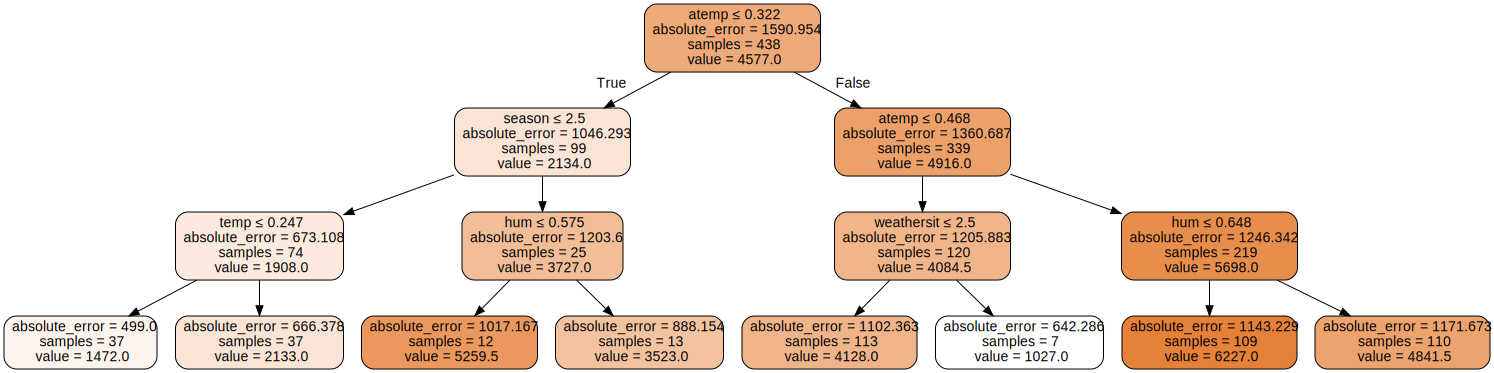

In [9]:
regressor = DecisionTreeRegressor(
    criterion='absolute_error', max_depth=3, min_samples_split=10
)
graph = get_graphviz_graph(regressor)
graph

Также сохраним визуализацию:

In [10]:
graph.format = 'png'
graph.render('dtree_depth_3',view=True)

'dtree_depth_3.png'

Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

In [11]:
min_mae = 1000000
best_max_depth = -1
for max_depth in range(1, 300): 
    model = DecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    valid_preds = model.predict(X_valid)
    mae = metrics.mean_absolute_error(y_valid, valid_preds)
    if max_depth < 10:
        print('Метрика MAE для max_depth = ' + str(max_depth) +':')
        print(mae)
    if mae < min_mae:
        min_mae = mae
        best_max_depth = max_depth
print('Оптимальное значение максимальной глубины дерева:')
print(best_max_depth)  

Метрика MAE для max_depth = 1:
1340.9974848459067
Метрика MAE для max_depth = 2:
1217.2213082341002
Метрика MAE для max_depth = 3:
1259.4315621766505
Метрика MAE для max_depth = 4:
1145.3228878015086
Метрика MAE для max_depth = 5:
1116.9649600230957
Метрика MAE для max_depth = 6:
1157.0856083874069
Метрика MAE для max_depth = 7:
1149.2038723352694
Метрика MAE для max_depth = 8:
1199.9969015173324
Метрика MAE для max_depth = 9:
1206.1417681099626
Оптимальное значение максимальной глубины дерева:
5


Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

Используем оптимальное значение максимальной глубины дерева, равное 5.

In [12]:
min_mae = 1000000
best_min_samples_leaf = -1
for min_samples_leaf in range(1, 300): 
    model = DecisionTreeRegressor(max_depth=5, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
    valid_preds = model.predict(X_valid)
    mae = metrics.mean_absolute_error(y_valid, valid_preds)
    if min_samples_leaf < 10:
        print('Метрика MAE для min_samples_leaf = ' + str(min_samples_leaf) +':')
        print(mae)
    if mae < min_mae:
        min_mae = mae
        best_min_samples_leaf = min_samples_leaf
print('Оптимальное значение минимального числа объектов в листе:')
print(best_min_samples_leaf)  

Метрика MAE для min_samples_leaf = 1:
1101.1731792011778
Метрика MAE для min_samples_leaf = 2:
1135.0986358221824
Метрика MAE для min_samples_leaf = 3:
1132.1796860504928
Метрика MAE для min_samples_leaf = 4:
1139.3231139696056
Метрика MAE для min_samples_leaf = 5:
1133.643164980239
Метрика MAE для min_samples_leaf = 6:
1133.1007743799719
Метрика MAE для min_samples_leaf = 7:
1130.3587504221944
Метрика MAE для min_samples_leaf = 8:
1153.0621255072635
Метрика MAE для min_samples_leaf = 9:
1154.3526056511682
Оптимальное значение минимального числа объектов в листе:
1


Получилось оптимальное значение минимального числа объектов в листе, равное 1.

Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его ошибку на тестовой части выборки.

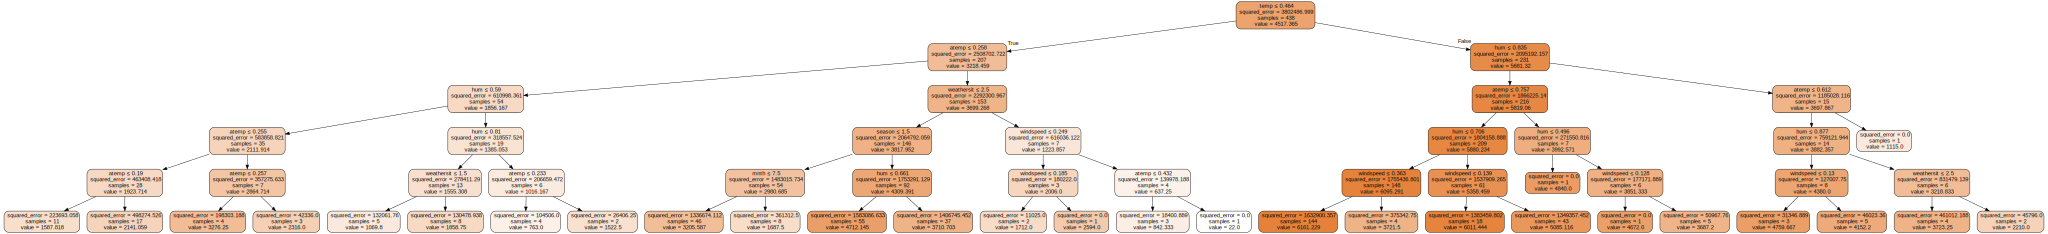

In [13]:
best_max_depth = 5
best_min_samples_leaf = 1
bеst_regressor = DecisionTreeRegressor(
    max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf
)
best_graph = get_graphviz_graph(bеst_regressor)
best_graph

Сохраним визуализацию:

In [14]:
best_graph.format = 'png'
best_graph.render('best_dtree',view=True)

'best_dtree.png'

Посчитаем ошибку дерева при оптимальных гиперпараметрах на тестовой части выборки:

In [15]:
test_preds = bеst_regressor.predict(X_test)
mae = metrics.mean_absolute_error(y_test, test_preds)
print('метрика MAE:')
print(mae)

метрика MAE:
1083.9660006764725


Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа, 
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

           feature_importances_df
features                         
season                   0.053361
mnth                      0.01395
holiday                       0.0
weekday                       0.0
workingday                    0.0
weathersit                0.04434
temp                     0.588197
atemp                    0.156976
hum                      0.108282
windspeed                0.034894


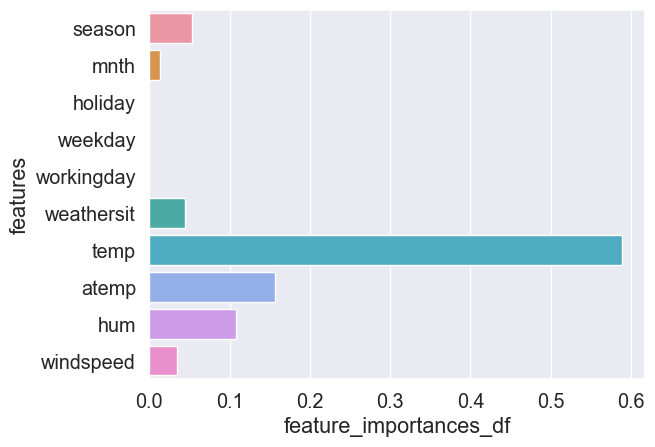

In [16]:
feature_importances = bеst_regressor.feature_importances_
features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
feature_importances_df = pd.DataFrame([features, feature_importances]).T
feature_importances_df.columns = ['features', 'feature_importances_df']
feature_importances_df = feature_importances_df.set_index('features')
print(feature_importances_df)
sns.set_style("darkgrid")
sns.barplot(y=feature_importances_df.index, x=feature_importances_df.feature_importances_df)
plt.show()

Сделайте выводы.

Наибольшей важностью обладает признак temp. Некоторые признаки имеют нулевую важность в построенном дереве, так как максимальная глубина дерева равна 5 и некоторые признаки не поучаствовали в итоговой модели. На тестовой выборке получилось значение метрики MAE = 1083.966, что несколько лучше, чем значение этой метрики при использовании метода линейной регрессии в task6.

---
### Задача 3.

Для данных из предыдущей части обучите случайный лес на 500 деревьев.

In [17]:
best_max_depth = 5
best_min_samples_leaf = 1
n_estimators = 500
forest_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, random_state=35)
forest_model.fit(X_train, y_train)
print('Лес обучен на 500 деревьях.')

Лес обучен на 500 деревьях.


Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

Посмотрим на метрику MAE для всего леса на валидационной выборке:

In [18]:
all_forest_valid_preds = forest_model.predict(X_valid)
mae = metrics.mean_absolute_error(y_valid, all_forest_valid_preds)
print('Метрика MAE для леса из 500 деревьев:')
print(mae)

Метрика MAE для леса из 500 деревьев:
1098.274043785247


Построим график зависимости ошибки модели от количества деревьев для обучающей выборки.

In [19]:
min_mae = 1000000
best_tree_count = -1
forest_mae = []
preds = np.stack([t.predict(X_train.values) for t in forest_model.estimators_])
for i in range(n_estimators):
    mae = metrics.mean_absolute_error(y_train, preds[i])
    forest_mae.append(mae)
    if mae < min_mae:
        min_mae = mae
        best_tree_count = i+1
print('Метрика MAE принимает минимальное значение ' + str(min_mae) + ' при ' + str(best_tree_count) +' деревьях в лесу на обучающей выборке.')

Метрика MAE принимает минимальное значение 866.5414148320597 при 146 деревьях в лесу на обучающей выборке.


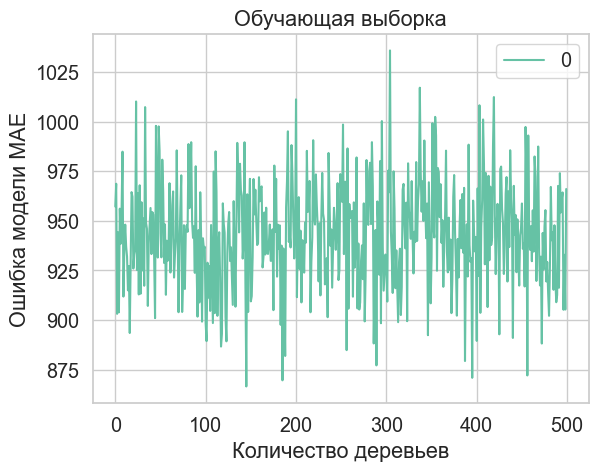

In [20]:
forest_mae_df = pd.DataFrame(forest_mae)
sns.set_style("whitegrid")
figure = forest_mae_df.plot()
figure.set_xlabel('Количество деревьев')
figure.set_ylabel('Ошибка модели MAE')
figure.set_title('Обучающая выборка')
plt.show()

Построим график зависимости ошибки модели от количества деревьев для валидационной выборки.

In [21]:
min_mae = 1000000
best_tree_count = -1
forest_mae = []
preds = np.stack([t.predict(X_valid.values) for t in forest_model.estimators_])
for i in range(n_estimators):
    mae = metrics.mean_absolute_error(y_valid, preds[i])
    forest_mae.append(mae)
    if mae < min_mae:
        min_mae = mae
        best_tree_count = i+1
print('Метрика MAE принимает минимальное значение ' + str(min_mae) + ' при ' + str(best_tree_count) +' дереве в лесу на валидационной выборке.')

Метрика MAE принимает минимальное значение 1038.2129249287302 при 171 дереве в лесу на валидационной выборке.


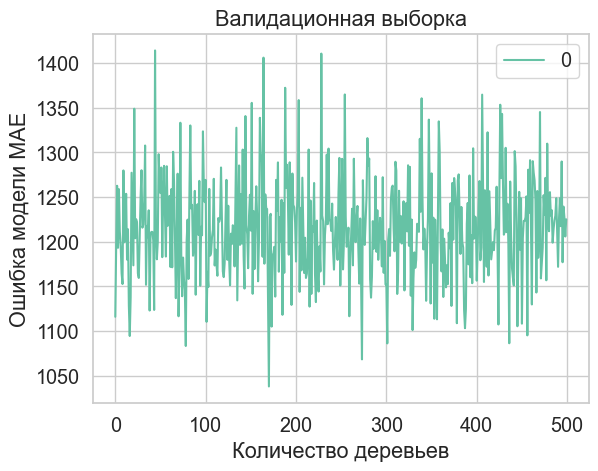

In [22]:
forest_mae_df = pd.DataFrame(forest_mae)
sns.set_style("whitegrid")
figure = forest_mae_df.plot()
figure.set_xlabel('Количество деревьев')
figure.set_ylabel('Ошибка модели MAE')
figure.set_title('Валидационная выборка')
plt.show()

Нарисуем графики зависимости ошибки модели от количества деревьев одновременно на обучающей и валидационной выборках, чтобы сравнить их поведение.

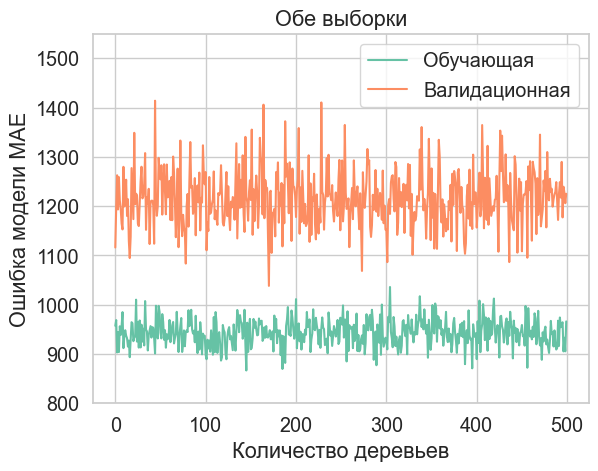

In [23]:
min_mae = 1000000
best_tree_count = -1
forest_mae = []
preds = np.stack([t.predict(X_train.values) for t in forest_model.estimators_])
for i in range(n_estimators):
    mae = metrics.mean_absolute_error(y_train, preds[i])
    forest_mae.append(mae)
    if mae < min_mae:
        min_mae = mae
        best_tree_count = i+1
        
forest_mae_df = pd.DataFrame(forest_mae, columns=['Обучающая'])
sns.set_style("whitegrid")
figure, ax = plt.subplots()
ax.set_xlabel('Количество деревьев')
ax.set_ylabel('Ошибка модели MAE')
ax.set_title('Обе выборки')
ax.set_ylim(800, 1550);
forest_mae_df.plot(ax=ax)

min_mae = 1000000
best_tree_count = -1
forest_mae = []
preds = np.stack([t.predict(X_valid.values) for t in forest_model.estimators_])
for i in range(n_estimators):
    mae = metrics.mean_absolute_error(y_valid, preds[i])
    forest_mae.append(mae)
    if mae < min_mae:
        min_mae = mae
        best_tree_count = i+1

forest_mae_df = pd.DataFrame(forest_mae, columns=['Валидационная'])
forest_mae_df.plot(ax=ax)
plt.show()

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`. 

           feature_importances_df
features                         
season                   0.069059
mnth                     0.010701
holiday                  0.002648
weekday                   0.01362
workingday               0.002946
weathersit               0.031414
temp                     0.454841
atemp                    0.246081
hum                      0.124437
windspeed                0.044252


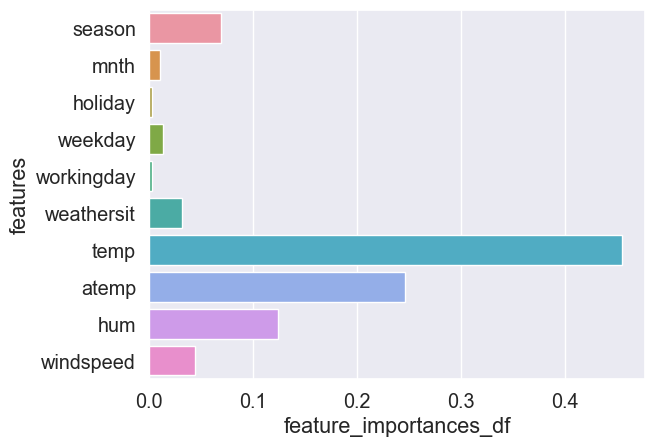

In [24]:
feature_importances = forest_model.feature_importances_
features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
feature_importances_df = pd.DataFrame([features, feature_importances]).T
feature_importances_df.columns = ['features', 'feature_importances_df']
feature_importances_df = feature_importances_df.set_index('features')
print(feature_importances_df)
sns.set_style("darkgrid")
sns.barplot(y=feature_importances_df.index, x=feature_importances_df.feature_importances_df)
plt.show()

Сделайте выводы.

На обучающей выборке произошло переобучение, значение метрики MAE там значительно ниже, чем на валидационной выборке при любом количестве используемых деревьев. На валидационной выборке минимальное значение MAE = 1038.213 получилось меньше, чем при анализе одного конкретного дерева в задаче 2 (там MAE = 1083.966). Значит, обучение случайного леса дает лучший результат, чем обучение только одного дерева. Параметры temp и atemp имеют самую большую важность. Влияние параметров holiday и workingday незначительно. 